In [6]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten , Conv2D , MaxPool2D , Dense , ZeroPadding2D , Dropout
from tensorflow.keras.utils import to_categorical

In [7]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [8]:
X_train , y_train = load_mnist('.',kind='train')
X_test , y_test = load_mnist('.',kind='t10k')

In [9]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [10]:
np.shape(X_train)

(60000, 784)

In [11]:
X_train = X_train.reshape(X_train.shape[0], 28, 28)
X_test = X_test.reshape(X_test.shape[0], 28, 28)

In [12]:
X_train = np.expand_dims(X_train , axis=3)
X_test = np.expand_dims(X_test , axis=3)

In [13]:
X_train.shape

(60000, 28, 28, 1)

In [14]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

In [8]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [9]:
model = Sequential([
    ZeroPadding2D(padding=(1,1), input_shape=(28, 28, 1)),
    Conv2D(32, 3, activation='relu'),
    Dropout(0.2),
    MaxPool2D(pool_size=2, strides=2),
    ZeroPadding2D(padding=(1,1)),
    Conv2D(64, 3, activation='relu'),
    Dropout(0.5),
    MaxPool2D(pool_size=2, strides=2),
    Flatten(),
    Dense(128 , activation='relu'),
    Dense(10 , activation='softmax'),
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPadding  (None, 30, 30, 1)        0         
 2D)                                                             
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 dropout (Dropout)           (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 zero_padding2d_1 (ZeroPaddi  (None, 16, 16, 32)       0         
 ng2D)                                                           
                                                        

In [11]:
model.compile('adam' , loss='categorical_crossentropy' , metrics=['accuracy'])

In [12]:
y_test_ohe = to_categorical(y_test)
y_train_ohe = to_categorical(y_train)


In [13]:
history = model.fit(X_train, y_train_ohe, epochs=10, validation_data=(X_test, y_test_ohe), batch_size=300 )

Epoch 1/10
200/200 [==============================] - 121s 602ms/step - loss: 0.5484 - accuracy: 0.8050 - val_loss: 0.4903 - val_accuracy: 0.8654
Epoch 2/10
200/200 [==============================] - 95s 473ms/step - loss: 0.3524 - accuracy: 0.8747 - val_loss: 0.4178 - val_accuracy: 0.8788
Epoch 3/10
200/200 [==============================] - 80s 400ms/step - loss: 0.3128 - accuracy: 0.8877 - val_loss: 0.3746 - val_accuracy: 0.8926
Epoch 4/10
200/200 [==============================] - 77s 387ms/step - loss: 0.2847 - accuracy: 0.8974 - val_loss: 0.3628 - val_accuracy: 0.8845
Epoch 5/10
200/200 [==============================] - 79s 394ms/step - loss: 0.2701 - accuracy: 0.9024 - val_loss: 0.3274 - val_accuracy: 0.8975
Epoch 6/10
200/200 [==============================] - 78s 389ms/step - loss: 0.2537 - accuracy: 0.9090 - val_loss: 0.3235 - val_accuracy: 0.8997
Epoch 7/10
200/200 [==============================] - 78s 388ms/step - loss: 0.2383 - accuracy: 0.9113 - val_loss: 0.3006 - val_a

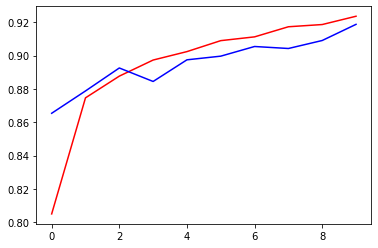

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red')
plt.plot(history.history['val_accuracy'],color='blue')